In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from utils.csv_handler import load_price_data, load_demand_data

In [2]:
# === Load training data: full November 2024 ===
dfp_train, price_train, ts_train = load_price_data(
    csv_path="../../data/electricity_price/dayahead_2024_11.csv",
    resolution="15min",
)

dfd_train, demand_train, _ = load_demand_data(
    csv_path="../../data/electricity_demand/demand_2024_11.csv",
    resolution="15min",
    demand_scale=1e-7, # Small-consumer / household-like load level
)

# === Load evaluation data: first week of November 2025 ===
dfp_eval, price_eval, ts_eval = load_price_data(
    csv_path="../../data/electricity_price/dayahead_2025_11.csv",
    resolution="15min",
    time_range=("2025-11-01", "2025-11-07"),
)

dfd_eval, demand_eval, _ = load_demand_data(
    csv_path="../../data/electricity_demand/demand_2025_11.csv",
    resolution="15min",
    time_range=("2025-11-01", "2025-11-07"),
    demand_scale=1e-7, # Small-consumer / household-like load level
)

print(len(price_eval), "time steps in a week (should be 672)")
print("Week from", ts_train[0], "to", ts_train[-1])

672 time steps in a week (should be 672)
Week from 2024-11-01 00:00:00+01:00 to 2024-11-30 23:45:00+01:00


In [3]:
# Build a single aligned dataframe
df = pd.DataFrame(
    {
        "price_EUR_per_MWh": np.asarray(price_eval, dtype=float),
        "demand_MWh": np.asarray(demand_eval, dtype=float),
    },
    index=pd.DatetimeIndex(ts_eval),
).dropna()

# Baseline: buy all demand from market
df["cost_eur_no_bess"] = df["price_EUR_per_MWh"] * df["demand_MWh"]

total_cost = df["cost_eur_no_bess"].sum()
total_energy_MWh = df["demand_MWh"].sum()
avg_cost_per_MWh = total_cost / max(total_energy_MWh, 1e-12)

print(f"Total energy (MWh): {total_energy_MWh:.6f}")
print(f"Total cost (EUR)  : {total_cost:.2f}")
print(f"Avg cost (EUR/MWh): {avg_cost_per_MWh:.2f}")

Total energy (MWh): 0.940289
Total cost (EUR)  : 82.61
Avg cost (EUR/MWh): 87.86


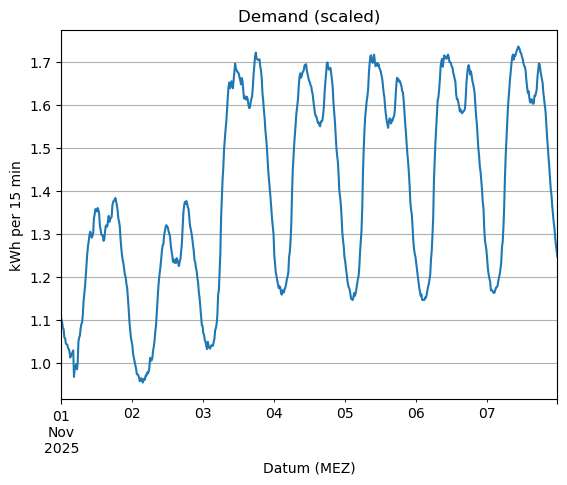

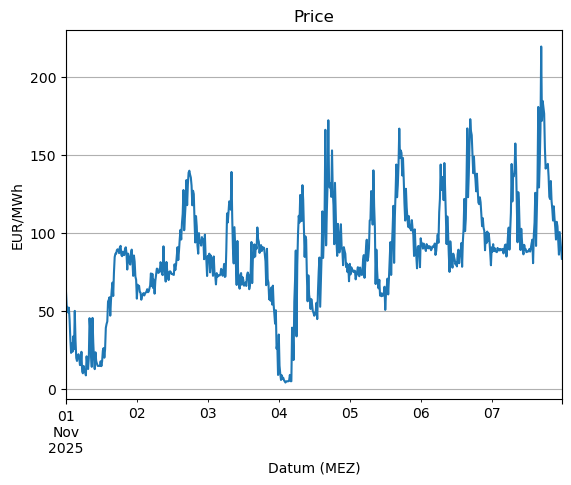

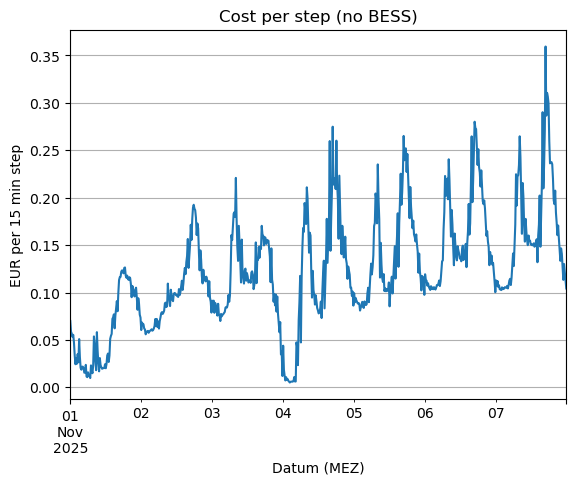

In [4]:
plt.figure()
(df["demand_MWh"] * 1000).plot()
plt.grid(True)
plt.ylabel("kWh per 15 min")
plt.title("Demand (scaled)")
plt.show()

plt.figure()
df["price_EUR_per_MWh"].plot()
plt.grid(True)
plt.ylabel("EUR/MWh")
plt.title("Price")
plt.show()

plt.figure()
df["cost_eur_no_bess"].plot()
plt.grid(True)
plt.ylabel("EUR per 15 min step")
plt.title("Cost per step (no BESS)")
plt.show()